# Aprendendo como mexer no Wavelet

In [1]:
from __future__ import division
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import pandas as pd

import pycwt as wavelet
from pycwt.helpers import find

In [2]:
dados = pd.read_excel('Fermi_Atualizado.xlsx')
print(dados['trigger_time'])

0     2021-12-23
1     2021-12-20
2     2021-12-19
3     2021-12-14
4     2021-12-01
         ...    
955   2012-01-14
956   2012-01-14
957   2012-01-14
958   2012-01-13
959   2012-01-10
Name: trigger_time, Length: 960, dtype: datetime64[ns]


In [3]:
# Excluir valores negativos de latitude
lat = dados['geo_lat']
for x in range(len(dados)):
    if lat[x] < 0:
        lat[x] = np.nan
dados = dados.dropna()
cont = dados['trigger_time'].groupby([dados["trigger_time"].dt.year, dados["trigger_time"].dt.month]).count()

C:\Users\Morgan-PC\AppData\Local\Temp\ipykernel_13496\1562732758.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lat[x] = np.nan


## Visualizar antes de dessazonalizar (Série temporal).

MultiIndex([(2012,  1),
            (2012,  4),
            (2012,  5),
            (2012,  6),
            (2012,  7),
            (2012,  8),
            (2012,  9),
            (2012, 10),
            (2012, 11),
            (2013,  1),
            ...
            (2021,  3),
            (2021,  4),
            (2021,  5),
            (2021,  6),
            (2021,  7),
            (2021,  8),
            (2021,  9),
            (2021, 10),
            (2021, 11),
            (2021, 12)],
           names=['trigger_time', 'trigger_time'], length=107)


<AxesSubplot:title={'center':'Série de eventos'}, xlabel='Data (Ano, mês)', ylabel='Contagem de eventos'>

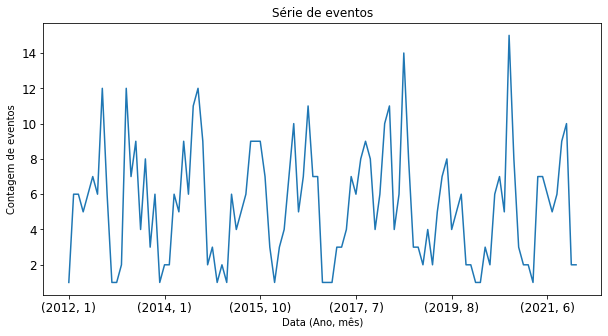

In [4]:

print(cont.index) # Utilizo para verificar o mês
valores = cont.tolist()
# print(valores) # Lista de contagens

tabelinha = pd.DataFrame(valores, index=cont.index)
tabelinha.plot(fontsize=12, figsize=(10, 5), title='Série de eventos', xlabel='Data (Ano, mês)', ylabel='Contagem de eventos', legend=None)

## Média de contagem dos meses

In [5]:
janeiro, fevereiro, marco, abril, maio, junho, julho, agosto, setembro, outubro, novembro, dezembro = 0,0,0,0,0,0,0,0,0,0,0,0
a,b,c,d,e,f,g,h,i,j,k,l = 0,0,0,0,0,0,0,0,0,0,0,0
cont_avg = []

In [6]:
for x in range(len(cont.index)):
    if cont.index[x][1] == 1:
        janeiro += valores[x]
        a += 1
    elif cont.index[x][1] == 2:
        fevereiro += valores[x]
        print(fevereiro)
        b += 1
    elif cont.index[x][1] == 3:
        marco += valores[x]
        c += 1
    elif cont.index[x][1] == 4:
        abril += valores[x]
        d += 1
    elif cont.index[x][1] == 5:
        maio += valores[x]
        e += 1
    elif cont.index[x][1] == 6:
        junho += valores[x]
        f += 1
    elif cont.index[x][1] == 7:
        julho += valores[x]
        g += 1
    elif cont.index[x][1] == 8:
        agosto += valores[x]
        h += 1
    elif cont.index[x][1] == 9:
        setembro += valores[x]
        i += 1
    elif cont.index[x][1] == 10:
        outubro += valores[x]
        j += 1
    elif cont.index[x][1] == 11:
        novembro += valores[x]
        k += 1
    else:
        dezembro += valores[x]
        l += 1

2
3
4
6


In [7]:
# jan_avg = round(janeiro/a)
# fev_avg = round(fevereiro/b)
# mar_avg = round(marco/c)
# abr_avg = round(abril/d)
# mai_avg = round(maio/e)
# jun_avg = round(junho/f)
# jul_avg = round(julho/g)
# ago_avg = round(agosto/h)
# set_avg = round(setembro/i)
# out_avg = round(outubro/j)
# nov_avg = round(novembro/k)
# dez_avg = round(dezembro/l)

jan_avg = janeiro/a
fev_avg = fevereiro/b
mar_avg = marco/c
abr_avg = abril/d
mai_avg = maio/e
jun_avg = junho/f
jul_avg = julho/g
ago_avg = agosto/h
set_avg = setembro/i
out_avg = outubro/j
nov_avg = novembro/k
dez_avg = dezembro/l

In [8]:
for i in range(len(cont.index)):
    mes_withAvg = 0.0
    if cont.index[i][1] == 1:
        mes_withAvg = valores[i] - jan_avg
    elif cont.index[i][1] == 2:
        mes_withAvg = valores[i] - fev_avg
    elif cont.index[i][1] == 3:
        mes_withAvg = valores[i] - mar_avg
    elif cont.index[i][1] == 4:
        mes_withAvg = valores[i] - abr_avg
    elif cont.index[i][1] == 5:
        mes_withAvg = valores[i] - mai_avg
    elif cont.index[i][1] == 6:
        mes_withAvg = valores[i] - jun_avg
    elif cont.index[i][1] == 7:
        mes_withAvg = valores[i] - jul_avg
    elif cont.index[i][1] == 8:
        mes_withAvg = valores[i] - ago_avg
    elif cont.index[i][1] == 9:
        mes_withAvg = valores[i] - set_avg
    elif cont.index[i][1] == 10:
        mes_withAvg = valores[i] - out_avg
    elif cont.index[i][1] == 11:
        mes_withAvg = valores[i] - nov_avg
    else:
        mes_withAvg = valores[i] - dez_avg
    # cont_avg.append(round(mes_withAvg))
    cont_avg.append(mes_withAvg)

anomalia = pd.Series(data=cont_avg, index=cont.index)

## Anomalia (Série dessazonalizada).

In [9]:
# print(cont.index) # Utilizo para verificar o mês
# print(cont_avg) # Lista de contagens
print(anomalia) # Serie de anos-meses tirado a média do mês
# anomalia.to_excel('Dessazonalizado.xlsx') # Salvar em excel

trigger_time  trigger_time
2012          1              -0.375000
              4               1.500000
              5              -0.200000
              6              -2.300000
              7              -0.200000
                                ...   
2021          8              -0.700000
              9              -0.800000
              10              2.000000
              11             -2.200000
              12             -0.142857
Length: 107, dtype: float64


<AxesSubplot:title={'center':'Série de anomalias'}, xlabel='Data (Ano, mês)', ylabel='Contagem de eventos'>

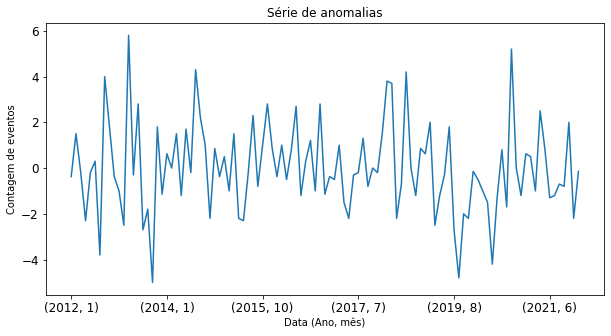

In [10]:
anomalia.plot(fontsize=12, figsize=(10, 5), title='Série de anomalias', xlabel='Data (Ano, mês)', ylabel='Contagem de eventos')

## Normalizando a anomalia (série já dessazonalizada).

In [11]:
# Arrumando o conjunto de valores para poder fazer a media
janeiro, fevereiro, marco, abril, maio, junho, julho, agosto, setembro, outubro, novembro, dezembro = [],[],[],[],[],[],[],[],[],[],[],[]
a = []
b = list(anomalia.values)
for x in b:
    a.append(x)

for x in range(len(anomalia.index)):
    if anomalia.index[x][1] == 1:
        janeiro.append(a[x])
    elif anomalia.index[x][1] == 2:
        fevereiro.append(a[x])
    elif anomalia.index[x][1] == 3:
        marco.append(a[x])
    elif anomalia.index[x][1] == 4:
        abril.append(a[x])
    elif anomalia.index[x][1] == 5:
        maio.append(a[x])
    elif anomalia.index[x][1] == 6:
        junho.append(a[x])
    elif anomalia.index[x][1] == 7:
        julho.append(a[x])
    elif anomalia.index[x][1] == 8:
        agosto.append(a[x])
    elif anomalia.index[x][1] == 9:
        setembro.append(a[x])
    elif anomalia.index[x][1] == 10:
        outubro.append(a[x])
    elif anomalia.index[x][1] == 11:
        novembro.append(a[x])
    else:
        dezembro.append(a[x])

In [12]:
# Média
jan_avg = np.mean(janeiro)
fev_avg = np.mean(fevereiro)
mar_avg = np.mean(marco)
abr_avg = np.mean(abril)
mai_avg = np.mean(maio)
jun_avg = np.mean(junho)
jul_avg = np.mean(julho)
ago_avg = np.mean(agosto)
set_avg = np.mean(setembro)
out_avg = np.mean(outubro)
nov_avg = np.mean(novembro)
dez_avg = np.mean(dezembro)

# Desvio-padrao
jan_std = np.std(janeiro)
fev_std = np.std(fevereiro)
mar_std = np.std(marco)
abr_std = np.std(abril)
mai_std = np.std(maio)
jun_std = np.std(junho)
jul_std = np.std(julho)
ago_std = np.std(agosto)
set_std = np.std(setembro)
out_std = np.std(outubro)
nov_std = np.std(novembro)
dez_std = np.std(dezembro)

print(jan_std)
print(fev_std)

0.4841229182759271
0.5


<AxesSubplot:title={'center':'Série de anomalias'}, xlabel='Data (Ano, mês)', ylabel='Contagem de anomalias'>

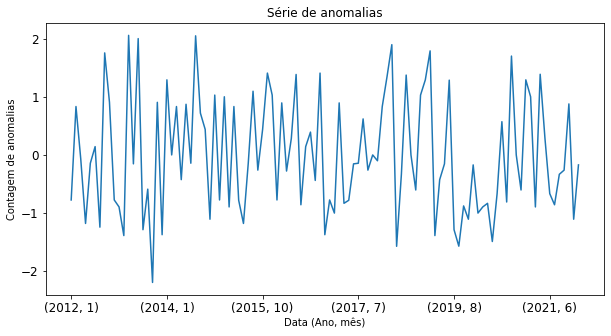

In [13]:
contNormalizada = []
for i in range(len(cont.index)):
    mes_Normalizado = 0.0
    if cont.index[i][1] == 1:
        mes_Normalizado = (a[i] - jan_avg)/jan_std
    elif cont.index[i][1] == 2:
        mes_Normalizado = (a[i] - fev_avg)/fev_std
    elif cont.index[i][1] == 3:
        mes_Normalizado = (a[i] - mar_avg)/mar_std
    elif cont.index[i][1] == 4:
        mes_Normalizado = (a[i] - abr_avg)/abr_std
    elif cont.index[i][1] == 5:
        mes_Normalizado = (a[i] - mai_avg)/mai_std
    elif cont.index[i][1] == 6:
        mes_Normalizado = (a[i] - jun_avg)/jun_std
    elif cont.index[i][1] == 7:
        mes_Normalizado = (a[i] - jul_avg)/jul_std
    elif cont.index[i][1] == 8:
        mes_Normalizado = (a[i] - ago_avg)/ago_std
    elif cont.index[i][1] == 9:
        mes_Normalizado = (a[i] - set_avg)/set_std
    elif cont.index[i][1] == 10:
        mes_Normalizado = (a[i] - out_avg)/out_std
    elif cont.index[i][1] == 11:
        mes_Normalizado = (a[i] - nov_avg)/nov_std
    else:
        mes_Normalizado = (a[i] - dez_avg)/dez_std
    # contAvgNormalizado.append(round(mes_Normalizado))
    contNormalizada.append(mes_Normalizado)

dadosNormalizados = pd.Series(data=contNormalizada, index=cont.index)
dadosNormalizados.plot(fontsize=12, figsize=(10, 5), title='Série de anomalias', xlabel='Data (Ano, mês)', ylabel='Contagem de anomalias')

## Wavelet
### Funcao: F(x) = (x - xAvg) / (std)

In [14]:
print(dadosNormalizados.head())

trigger_time  trigger_time
2012          1              -0.774597
              4               0.832050
              5              -0.070888
              6              -1.178326
              7              -0.142857
dtype: float64


In [15]:
# Arrumando tabela de valores
dados = []
b = list(dadosNormalizados.values)
# b = list(anomalia.values)
for x in b:
    dados.append(x)
    
dados = pd.DataFrame(dados, columns=['dados normalizados'])
dat = dados['dados normalizados']

title = 'Número de TGF por mês'
label = 'Números de TGFs'
units = 'Unidade'

t0 = 2012.083333 # Ano-Mês inicial
dt = (1)/(12) # Intervalos de 1 mês
N = dat.size
t = np.arange(0,N) * dt + t0

print(dat)

0     -0.774597
1      0.832050
2     -0.070888
3     -1.178326
4     -0.142857
         ...   
102   -0.333333
103   -0.261488
104    0.877058
105   -1.105542
106   -0.171499
Name: dados normalizados, Length: 107, dtype: float64


In [16]:
mother = wavelet.Morlet(6)
s0 = 1 * dt # Escala inicial
dj = 1 / 12  
J = 7 / dj 
dat = np.array(dat)
alpha, _, _ = wavelet.ar1(dat)

In [17]:
# Aplica transformada
wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat, dt, dj, s0, J, mother)

In [18]:
# espectro de potencia
power = (np.abs(wave)) ** 2
fft_power = np.abs(fft) ** 2
period = (1 / freqs) 
# retifica
power /= scales[:, None]

In [19]:
# teste de significancia do espectro de potencia
signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)
sig95 = np.ones([1, N]) * signif[:, None]
sig95 = power / sig95

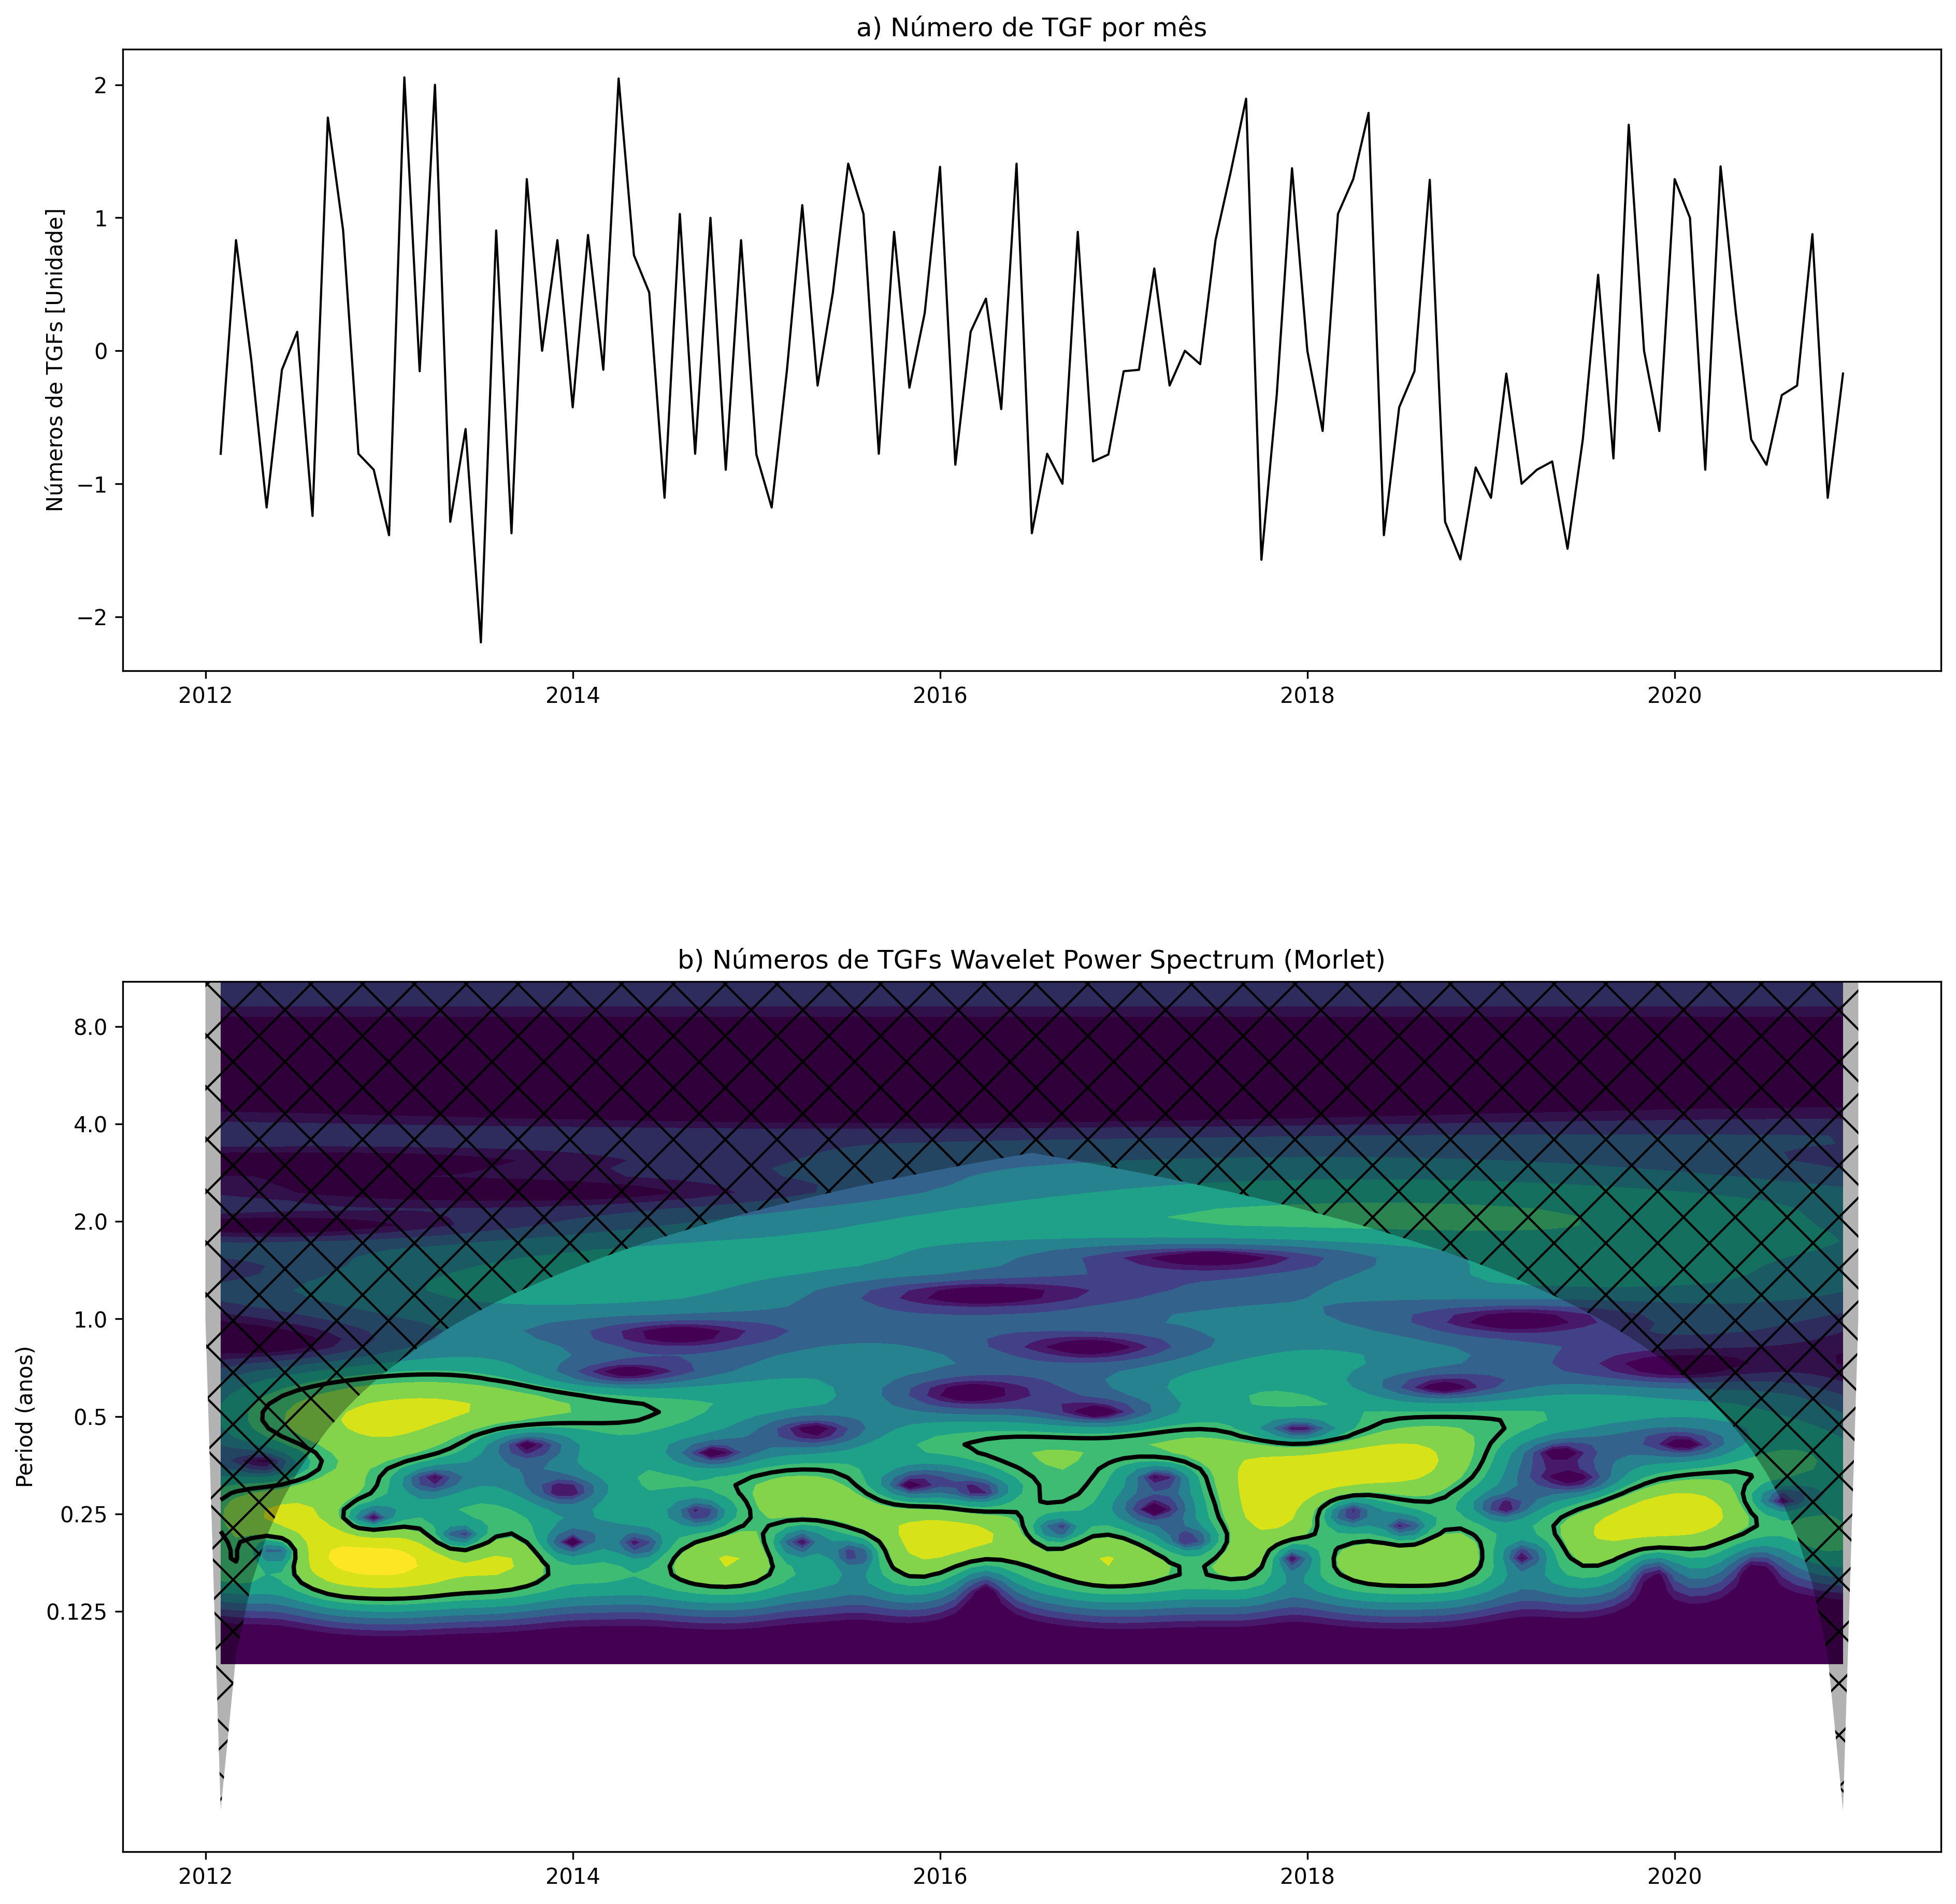

In [20]:
#figure
pyplot.close('all')
pyplot.ioff()
figprops = dict(figsize=(18, 20), dpi=300)
fig = pyplot.figure(**figprops)

#original timeseries
ax = pyplot.axes([0.1, 0.75, 0.65, 0.2])
ax.plot(t, dat, 'k', linewidth=1.)
ax.set_title('a) {}'.format(title))
ax.set_ylabel(r'{} [{}]'.format(label, units))

#normalized wavelet power spectrum
bx = pyplot.axes([0.1, 0.37, 0.65, 0.28], sharex=ax)
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
bx.contourf(t, np.log2(period), np.log2(power), np.log2(levels),
            extend='both', cmap=pyplot.cm.viridis)
extent = [t.min(), t.max(), 0, max(period)]
bx.contour(t, np.log2(period), sig95, [-99, 1], colors='k', linewidths=2,
           extent=extent)
bx.fill(np.concatenate([t, t[-1:] + dt, t[-1:] + dt,
                           t[:1] - dt, t[:1] - dt]),
        np.concatenate([np.log2(coi), [1e-9], np.log2(period[-1:]),
                           np.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')
bx.set_title('b) {} Wavelet Power Spectrum ({})'.format(label, mother.name))
bx.set_ylabel('Period (anos)')
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                           np.ceil(np.log2(period.max())))
bx.set_yticks(np.log2(Yticks))
bx.set_yticklabels(Yticks)


pyplot.show()